In [ ]:
!nvidia-smi     #Verify GPU Allocation

Fri Jan 10 19:04:57 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 23.9 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AVTVYWwOyJBSBw0jbFQf")
project = rf.workspace("yolo-eh6cy").project("weld-quality-inspection-rei9l-3rsxl")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weld-quality-inspection-5 in yolov11:: 100%|██████████| 9342/9342 [00:05<00:00, 1747.54it/s]


In [ ]:
dataset.location

'/content/Weld-quality-inspection-5'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 86.0MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Weld-quality-inspection-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [ ]:
!yolo task=detect mode=val model="runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Weld-quality-inspection-5/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 175, len(boxes) = 320. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.25it/s]
                   all        235        320      0.622      0.632      0.602      0.359
           Bad Welding        103        113      0.654      0.703      0.683      0.423
          Good Welding        149        207      0.589       0.56      0.522      0.295
Speed: 2.7ms preprocess, 5.7ms 

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/116 /content/Weld-quality-inspection-5/test/images/Good-Welding-images_12_jpeg_jpg.rf.033542ffab33bf0be3d73eec9cf9409e.jpg: 640x640 1 Good Welding, 22.8ms
image 2/116 /content/Weld-quality-inspection-5/test/images/Good-Welding-images_17_jpeg_jpg.rf.e3762f6e3b119e88f1b0b52230fadc7a.jpg: 640x640 1 Bad Welding, 1 Good Welding, 15.3ms
image 3/116 /content/Weld-quality-inspection-5/test/images/Good-Welding-images_23_jpeg_jpg.rf.4488f04f70154d833255a6fb40de4238.jpg: 640x640 1 Bad Welding, 1 Good Welding, 14.5ms
image 4/116 /content/Weld-quality-inspection-5/test/images/Good-Welding-images_28_png_jpg.rf.4d7d3b8a5aa89afcba612729293882a3.jpg: 640x640 2 Good Weldings, 15.4ms
image 5/116 /content/Weld-quality-inspection-5/test/images/Good-Welding-images_28_png_jpg.rf.defa3f2709137af8fdaf3f72bf1cd916.jpg: 640x640 2 Good Weldin

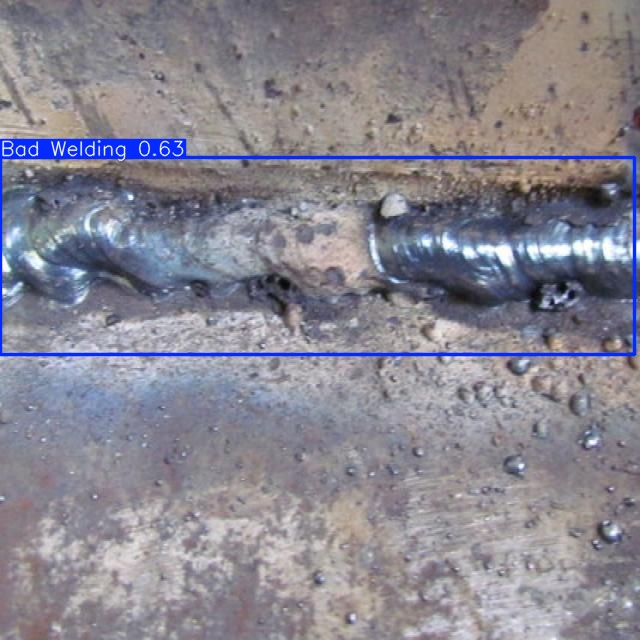

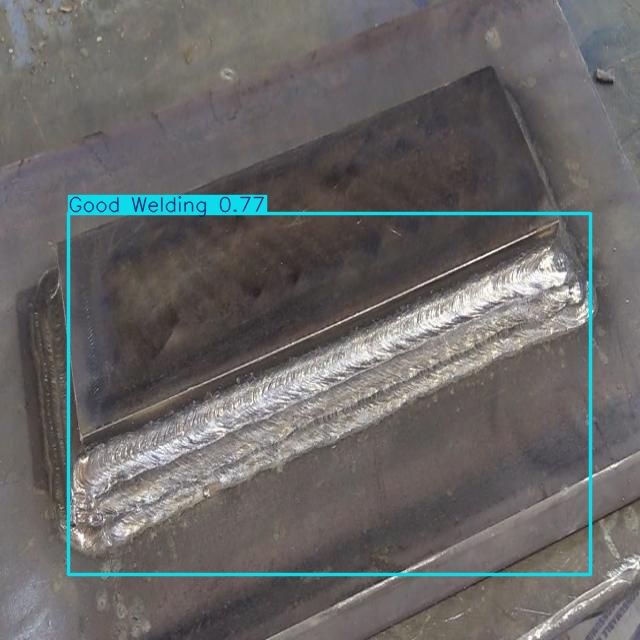

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict2*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source=c.jpg save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/c.jpg: 640x640 1 Good Welding, 11.6ms
Speed: 2.6ms preprocess, 11.6ms inference, 587.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


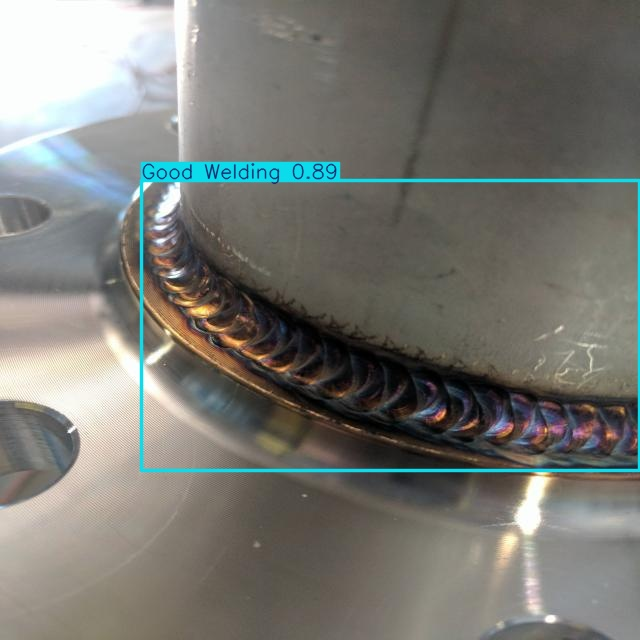

In [ ]:
Image("/content/runs/detect/predict4/c.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt  conf=0.25 source="PPE_Part1.mp4" save=True